## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ All libraries imported successfully')

✅ All libraries imported successfully


## 2. Load Generated Data

In [7]:
# Load both datasets
summary_df = pd.read_csv('trip_summary.csv')
telemetry_df = pd.read_csv('telemetry_data.csv')

print(f"✅ Loaded Summary Data: {summary_df.shape}")
print(f"✅ Loaded Telemetry Data: {telemetry_df.shape}")

print("\n📊 Summary Data Columns:")
print(summary_df.columns.tolist())

print("\n📊 Telemetry Data Columns:")
print(telemetry_df.columns.tolist())

✅ Loaded Summary Data: (200, 21)
✅ Loaded Telemetry Data: (381240, 18)

📊 Summary Data Columns:
['trip_id', 'driver_id', 'timestamp', 'safe_driving_score', 'driver_category', 'driver_category_ar', 'trip_duration_minutes', 'avg_speed', 'max_speed', 'harsh_brakes_count', 'harsh_accels_count', 'lane_changes_count', 'speeding_percentage', 'avg_congestion', 'avg_visibility', 'road_type', 'actual_driver_type', 'time_of_day', 'weather', 'recommendation', 'recommendation_ar']

📊 Telemetry Data Columns:
['trip_id', 'driver_id', 'second', 'speed_kmh', 'acceleration_kmh2', 'harsh_brake', 'harsh_accel', 'lane_change', 'congestion_level', 'speed_limit', 'sign_density', 'road_curvature', 'road_type', 'driver_type', 'time_of_day', 'weather', 'visibility', 'timestamp']


## 3. Data Exploration

In [3]:
# Basic statistics
print("=" * 70)
print("SUMMARY DATASET OVERVIEW")
print("=" * 70)
print(summary_df.head(10))

print("\n" + "=" * 70)
print("DATA TYPES")
print("=" * 70)
print(summary_df.dtypes)

print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
print(summary_df.isnull().sum())

SUMMARY DATASET OVERVIEW
    trip_id driver_id                   timestamp  safe_driving_score  \
0  6c220ab9  7f7590dd  2025-12-11 19:33:09.632717                0.00   
1  e65c5330  97a42175  2025-12-11 19:33:09.688938               61.56   
2  b02c75f0  e388c802  2025-12-11 19:33:09.733356                0.00   
3  707c3ae0  3685d56d  2025-12-11 19:33:09.793956                0.00   
4  9974c587  41923037  2025-12-11 19:33:09.807986                0.00   
5  7b261fce  46a4fe9a  2025-12-11 19:33:09.835563                0.00   
6  34454c9c  364afe6d  2025-12-11 19:33:09.893471                0.00   
7  93fca64a  c15e0831  2025-12-11 19:33:09.949413                0.00   
8  a50118de  46567657  2025-12-11 19:33:10.082300                0.00   
9  920b40d4  a4e10a29  2025-12-11 19:33:10.188351               53.53   

  driver_category driver_category_ar  trip_duration_minutes  avg_speed  \
0           risky                خطر                   18.0      92.40   
1        moderate      

In [4]:
# Statistical summary
print("\n📈 NUMERICAL STATISTICS")
print("=" * 70)
print(summary_df[['safe_driving_score', 'avg_speed', 'max_speed', 
                   'harsh_brakes_count', 'lane_changes_count', 
                   'speeding_percentage']].describe())


📈 NUMERICAL STATISTICS
       safe_driving_score  avg_speed   max_speed  harsh_brakes_count  \
count          200.000000  200.00000  200.000000          200.000000   
mean            12.401300   55.87305   93.186950          195.990000   
std             26.011089   26.36360   31.808611          196.870158   
min              0.000000   17.56000   46.550000            0.000000   
25%              0.000000   33.93750   64.937500           19.750000   
50%              0.000000   52.02500   89.265000          114.500000   
75%              0.125000   73.74500  122.335000          342.250000   
max            100.000000  121.32000  156.000000          774.000000   

       lane_changes_count  speeding_percentage  
count          200.000000           200.000000  
mean            10.910000            14.264700  
std             10.729282            22.856403  
min              0.000000             0.000000  
25%              3.000000             0.830000  
50%              7.000000        

In [5]:
# Categorical distributions
print("\n👥 DRIVER TYPE DISTRIBUTION")
print(summary_df['actual_driver_type'].value_counts())

print("\n🏆 DRIVER CATEGORY (by score) DISTRIBUTION")
print(summary_df['driver_category'].value_counts())

print("\n🛣️  ROAD TYPE DISTRIBUTION")
print(summary_df['road_type'].value_counts())

print("\n⏰ TIME OF DAY DISTRIBUTION")
print(summary_df['time_of_day'].value_counts())

print("\n🌤️  WEATHER DISTRIBUTION")
print(summary_df['weather'].value_counts())


👥 DRIVER TYPE DISTRIBUTION
actual_driver_type
aggressive    65
safe          52
moderate      44
distracted    39
Name: count, dtype: int64

🏆 DRIVER CATEGORY (by score) DISTRIBUTION
driver_category
risky       175
moderate     13
safe         12
Name: count, dtype: int64

🛣️  ROAD TYPE DISTRIBUTION
road_type
highway        66
city_street    50
main_road      42
residential    42
Name: count, dtype: int64

⏰ TIME OF DAY DISTRIBUTION
time_of_day
night           46
midday          43
morning_rush    43
evening_rush    42
late_night      26
Name: count, dtype: int64

🌤️  WEATHER DISTRIBUTION
weather
heavy_rain    48
clear         39
light_rain    39
fog           38
sandstorm     36
Name: count, dtype: int64


## 4. Advanced Feature Engineering

In [8]:
# Create a copy for feature engineering
df_features = summary_df.copy()

# 1. SPEED-RELATED FEATURES
# Calculate speed excess based on typical road limits (we don't have explicit speed_limit column)
# Using avg_speed as reference for safe speed
df_features['speed_excess'] = df_features['max_speed'] - df_features['avg_speed']
df_features['speed_excess'] = df_features['speed_excess'].apply(lambda x: max(0, x))
df_features['speed_consistency'] = 1 - (df_features['speeding_percentage'] / 100.0)

# 2. SAFETY EVENT FEATURES
df_features['total_harsh_events'] = (df_features['harsh_brakes_count'] + 
                                       df_features['harsh_accels_count'])
df_features['events_per_minute'] = (df_features['total_harsh_events'] / 
                                      (df_features['trip_duration_minutes'] + 1))  # +1 to avoid division by zero

# 3. DRIVING STABILITY FEATURES
df_features['lane_change_intensity'] = (df_features['lane_changes_count'] / 
                                          (df_features['trip_duration_minutes'] + 1))
df_features['braking_intensity'] = (df_features['harsh_brakes_count'] / 
                                      (df_features['trip_duration_minutes'] + 1))

# 4. CONTEXTUAL FEATURES
df_features['difficult_conditions'] = (df_features['avg_congestion'] > 0.5).astype(int)
df_features['low_visibility'] = (df_features['avg_visibility'] < 70).astype(int)
df_features['combined_risk'] = df_features['difficult_conditions'] + df_features['low_visibility']

# 5. OVERALL SAFETY METRIC
df_features['safety_index'] = (
    df_features['speed_consistency'] * 0.3 +
    (1 - (df_features['events_per_minute'] / (df_features['events_per_minute'].max() + 1))) * 0.4 +
    (1 - (df_features['lane_change_intensity'] / (df_features['lane_change_intensity'].max() + 1))) * 0.3
)

print("✅ Feature engineering completed!")
print(f"\n📊 New features created:")
print(df_features[['speed_excess', 'speed_consistency', 'total_harsh_events',
                   'events_per_minute', 'braking_intensity', 'safety_index']].head(10))

✅ Feature engineering completed!

📊 New features created:
   speed_excess  speed_consistency  total_harsh_events  events_per_minute  \
0         62.42             0.8713                 375          19.736842   
1         16.65             0.9953                  13           0.295455   
2         53.16             0.9764                 487          13.162162   
3         30.08             0.9991                  62           3.263158   
4         47.02             0.9358                 273          13.000000   
5         55.14             0.9415                 757          18.023810   
6         24.14             0.7522                 512          13.128205   
7         54.86             0.9919                 545          14.342105   
8         53.09             0.9529                 949          17.905660   
9         17.57             0.9965                  15           0.340909   

   braking_intensity  safety_index  
0          12.526316      0.500852  
1           0.295455

## 5. Encoding Categorical Variables

In [10]:
# Create copy for ML preparation
df_ml = df_features.copy()

# Encode categorical variables
le_road = LabelEncoder()
le_driver_type = LabelEncoder()
le_time = LabelEncoder()
le_weather = LabelEncoder()
le_category = LabelEncoder()

df_ml['road_type_encoded'] = le_road.fit_transform(df_ml['road_type'])
df_ml['actual_driver_type_encoded'] = le_driver_type.fit_transform(df_ml['actual_driver_type'])
df_ml['time_of_day_encoded'] = le_time.fit_transform(df_ml['time_of_day'])
df_ml['weather_encoded'] = le_weather.fit_transform(df_ml['weather'])
df_ml['driver_category_encoded'] = le_category.fit_transform(df_ml['driver_category'])

print("✅ Categorical encoding completed!")
print("\n📊 Encoding Mappings:")
print(f"Road Types: {dict(zip(le_road.classes_, le_road.transform(le_road.classes_)))}")
print(f"Driver Types: {dict(zip(le_driver_type.classes_, le_driver_type.transform(le_driver_type.classes_)))}")
print(f"Driver Categories: {dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))}")

# Store label encoders for later use
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump({
        'road_type': le_road,
        'driver_type': le_driver_type,
        'time_of_day': le_time,
        'weather': le_weather,
        'category': le_category
    }, f)
print("\n✅ Label encoders saved for later use")

✅ Categorical encoding completed!

📊 Encoding Mappings:
Road Types: {'city_street': np.int64(0), 'highway': np.int64(1), 'main_road': np.int64(2), 'residential': np.int64(3)}
Driver Types: {'aggressive': np.int64(0), 'distracted': np.int64(1), 'moderate': np.int64(2), 'safe': np.int64(3)}
Driver Categories: {'moderate': np.int64(0), 'risky': np.int64(1), 'safe': np.int64(2)}

✅ Label encoders saved for later use


## 6. Feature Scaling & Normalization

In [11]:
# Select features for scaling
features_to_scale = [
    'avg_speed', 'max_speed', 'speed_excess', 'speed_consistency',
    'harsh_brakes_count', 'harsh_accels_count', 'lane_changes_count',
    'speeding_percentage', 'avg_congestion', 'avg_visibility',
    'trip_duration_minutes', 'total_harsh_events', 'events_per_minute',
    'braking_intensity', 'lane_change_intensity', 'safety_index'
]

scaler = StandardScaler()
df_ml[features_to_scale] = scaler.fit_transform(df_ml[features_to_scale])

print("✅ Feature scaling completed!")
print("\n📊 Scaled Features Sample:")
print(df_ml[features_to_scale].head())

✅ Feature scaling completed!

📊 Scaled Features Sample:
   avg_speed  max_speed  speed_excess  speed_consistency  harsh_brakes_count  \
0   1.388984   1.942484      1.332700           0.061173            0.213925   
1   1.931238   0.949386     -1.096896           0.605052           -0.931828   
2  -1.218858  -0.510793      0.841154           0.522155            0.850454   
3   1.412180   0.942452     -0.383995           0.621719           -0.763785   
4  -0.946590  -0.478646      0.515226           0.344078           -0.035595   

   harsh_accels_count  lane_changes_count  speeding_percentage  \
0            0.546558            0.008409            -0.061173   
1           -0.844717           -0.739085            -0.605052   
2            0.414539            1.036214            -0.522155   
3           -0.682233           -0.832522            -0.621719   
4            0.008327           -0.271901            -0.344078   

   avg_congestion  avg_visibility  trip_duration_minutes  total_ha

## 7. Prepare Training Data

In [12]:
# Select features for ML model
ml_features = [
    'avg_speed', 'max_speed', 'speed_excess', 'speed_consistency',
    'harsh_brakes_count', 'harsh_accels_count', 'lane_changes_count',
    'speeding_percentage', 'avg_congestion', 'avg_visibility',
    'trip_duration_minutes', 'total_harsh_events', 'events_per_minute',
    'braking_intensity', 'lane_change_intensity', 'safety_index',
    'road_type_encoded', 'time_of_day_encoded', 'weather_encoded',
    'difficult_conditions', 'low_visibility'
]

# Target variable
target = 'driver_category_encoded'

# Create X and y
X = df_ml[ml_features]
y = df_ml[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training data prepared!")
print(f"\n📊 Dataset Shapes:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")

print(f"\n📈 Target Distribution:")
print(f"   Training: \n{y_train.value_counts()}")
print(f"\n   Testing: \n{y_test.value_counts()}")

✅ Training data prepared!

📊 Dataset Shapes:
   X_train: (160, 21)
   X_test: (40, 21)
   y_train: (160,)
   y_test: (40,)

📈 Target Distribution:
   Training: 
driver_category_encoded
1    140
2     10
0     10
Name: count, dtype: int64

   Testing: 
driver_category_encoded
1    35
0     3
2     2
Name: count, dtype: int64


## 8. Save Processed Data for ML

In [13]:
# Save processed data
df_ml.to_csv('processed_data_with_features.csv', index=False)

# Save training sets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✅ All processed data saved!")
print("\n📁 Saved Files:")
print("   1. processed_data_with_features.csv - Complete dataset with all features")
print("   2. X_train.csv - Training features")
print("   3. X_test.csv - Testing features")
print("   4. y_train.csv - Training labels")
print("   5. y_test.csv - Testing labels")

✅ All processed data saved!

📁 Saved Files:
   1. processed_data_with_features.csv - Complete dataset with all features
   2. X_train.csv - Training features
   3. X_test.csv - Testing features
   4. y_train.csv - Training labels
   5. y_test.csv - Testing labels


## 9. Visualization - Score Distribution

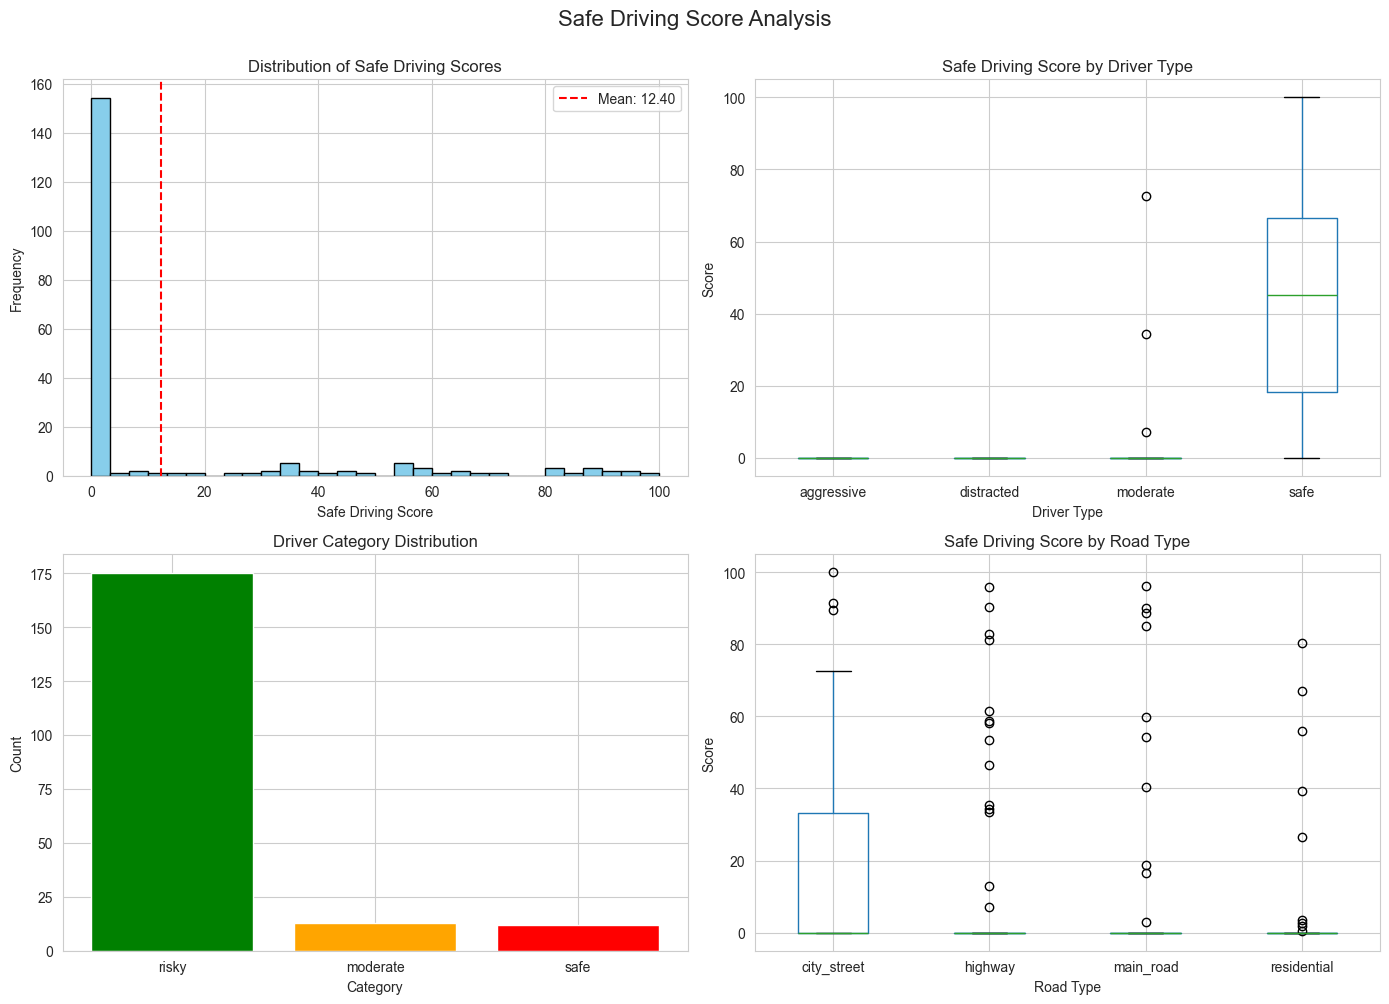

✅ Visualization saved as '01_score_analysis.png'


In [14]:
# Plot safe driving score distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Score distribution
axes[0, 0].hist(summary_df['safe_driving_score'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Safe Driving Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Safe Driving Scores')
axes[0, 0].axvline(summary_df['safe_driving_score'].mean(), color='red', linestyle='--', label=f"Mean: {summary_df['safe_driving_score'].mean():.2f}")
axes[0, 0].legend()

# 2. Score by driver type
summary_df.boxplot(column='safe_driving_score', by='actual_driver_type', ax=axes[0, 1])
axes[0, 1].set_title('Safe Driving Score by Driver Type')
axes[0, 1].set_xlabel('Driver Type')
axes[0, 1].set_ylabel('Score')

# 3. Category distribution
category_counts = summary_df['driver_category'].value_counts()
axes[1, 0].bar(category_counts.index, category_counts.values, color=['green', 'orange', 'red'])
axes[1, 0].set_title('Driver Category Distribution')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')

# 4. Score by road type
summary_df.boxplot(column='safe_driving_score', by='road_type', ax=axes[1, 1])
axes[1, 1].set_title('Safe Driving Score by Road Type')
axes[1, 1].set_xlabel('Road Type')
axes[1, 1].set_ylabel('Score')

plt.suptitle('Safe Driving Score Analysis', fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig('01_score_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved as '01_score_analysis.png'")

## 10. Visualization - Behavioral Patterns

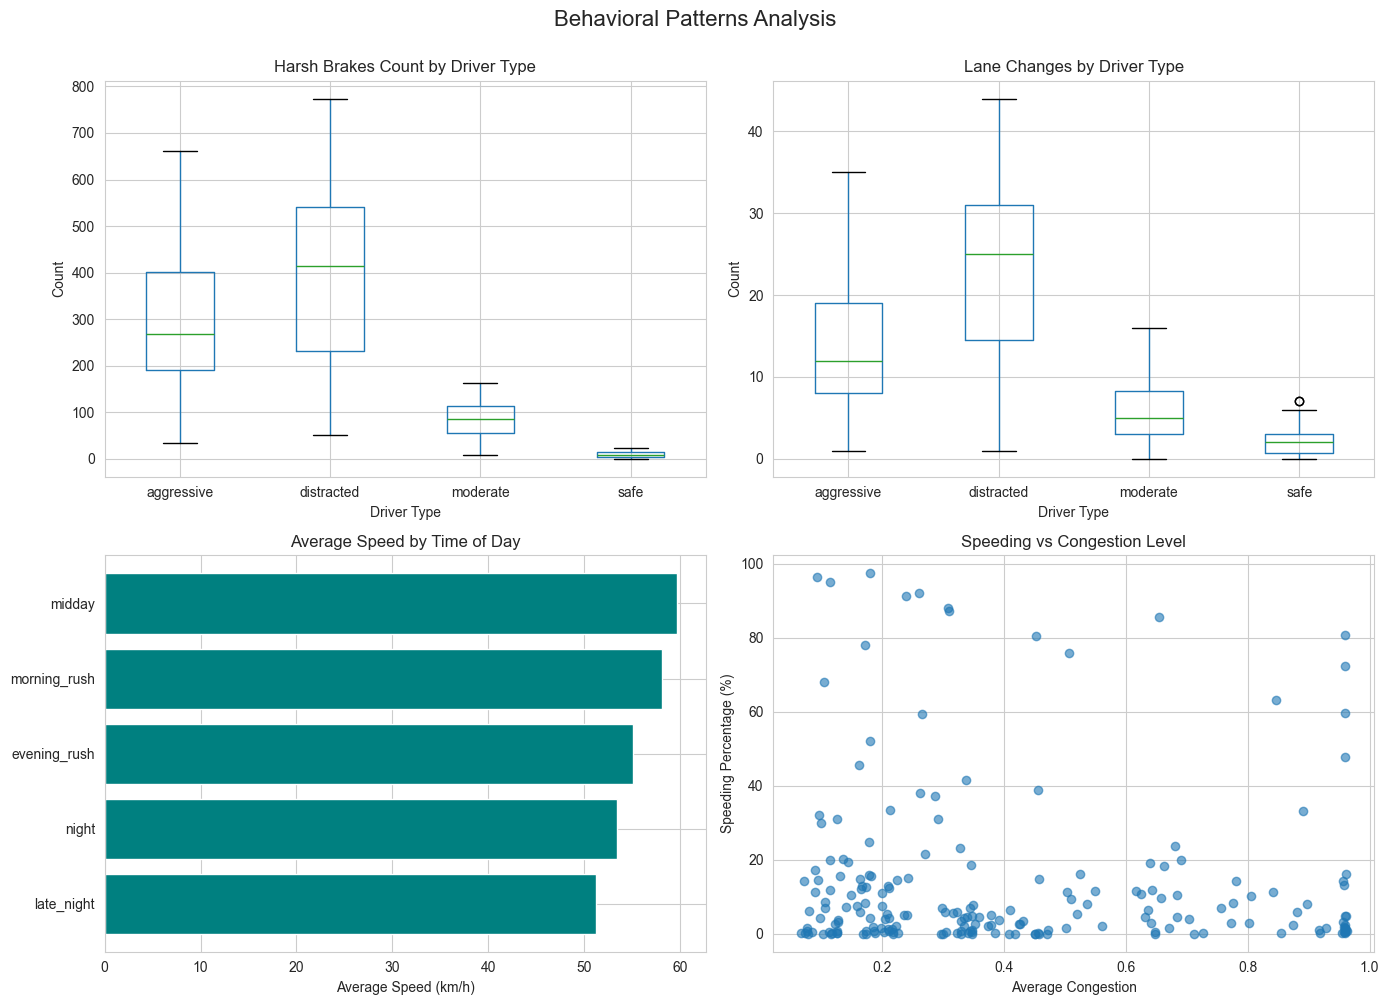

✅ Visualization saved as '02_behavioral_patterns.png'


In [15]:
# Plot behavioral metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Harsh brakes by driver type
summary_df.boxplot(column='harsh_brakes_count', by='actual_driver_type', ax=axes[0, 0])
axes[0, 0].set_title('Harsh Brakes Count by Driver Type')
axes[0, 0].set_xlabel('Driver Type')
axes[0, 0].set_ylabel('Count')

# 2. Lane changes by driver type
summary_df.boxplot(column='lane_changes_count', by='actual_driver_type', ax=axes[0, 1])
axes[0, 1].set_title('Lane Changes by Driver Type')
axes[0, 1].set_xlabel('Driver Type')
axes[0, 1].set_ylabel('Count')

# 3. Average speed by time of day
time_speed = summary_df.groupby('time_of_day')['avg_speed'].mean().sort_values()
axes[1, 0].barh(time_speed.index, time_speed.values, color='teal')
axes[1, 0].set_title('Average Speed by Time of Day')
axes[1, 0].set_xlabel('Average Speed (km/h)')

# 4. Speeding percentage by congestion
axes[1, 1].scatter(summary_df['avg_congestion'], summary_df['speeding_percentage'], alpha=0.6)
axes[1, 1].set_title('Speeding vs Congestion Level')
axes[1, 1].set_xlabel('Average Congestion')
axes[1, 1].set_ylabel('Speeding Percentage (%)')

plt.suptitle('Behavioral Patterns Analysis', fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig('02_behavioral_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved as '02_behavioral_patterns.png'")

## 11. Feature Importance Analysis (Preview)

In [16]:
# Correlation analysis
numeric_cols = X_train.columns
correlation_with_target = []

for col in numeric_cols:
    corr = np.corrcoef(X_train[col], y_train)[0, 1]
    correlation_with_target.append((col, abs(corr)))

correlation_with_target.sort(key=lambda x: x[1], reverse=True)

print("\n📊 Top 15 Features by Correlation with Target:")
print("=" * 60)
for i, (feature, corr) in enumerate(correlation_with_target[:15], 1):
    print(f"{i:2d}. {feature:30s} | Correlation: {corr:.4f}")


📊 Top 15 Features by Correlation with Target:
 1. trip_duration_minutes          | Correlation: 0.1806
 2. road_type_encoded              | Correlation: 0.0827
 3. speed_consistency              | Correlation: 0.0620
 4. speeding_percentage            | Correlation: 0.0620
 5. weather_encoded                | Correlation: 0.0511
 6. avg_visibility                 | Correlation: 0.0369
 7. low_visibility                 | Correlation: 0.0363
 8. avg_congestion                 | Correlation: 0.0343
 9. safety_index                   | Correlation: 0.0326
10. max_speed                      | Correlation: 0.0317
11. speed_excess                   | Correlation: 0.0245
12. avg_speed                      | Correlation: 0.0210
13. lane_changes_count             | Correlation: 0.0180
14. braking_intensity              | Correlation: 0.0089
15. lane_change_intensity          | Correlation: 0.0088


## 12. Summary Statistics

In [17]:
print("\n" + "=" * 70)
print("FINAL SUMMARY - DATA PREPARATION COMPLETE")
print("=" * 70)

print(f"\n📊 Total Records: {len(df_ml)}")
print(f"📊 Total Features (after engineering): {len(ml_features)}")
print(f"\n🎯 Target Distribution:")
print(summary_df['driver_category'].value_counts())

print(f"\n📈 Key Metrics:")
print(f"   Safe Driving Score - Mean: {summary_df['safe_driving_score'].mean():.2f}")
print(f"   Safe Driving Score - Std Dev: {summary_df['safe_driving_score'].std():.2f}")
print(f"   Average Speed - Mean: {summary_df['avg_speed'].mean():.2f} km/h")
print(f"   Harsh Brakes - Mean: {summary_df['harsh_brakes_count'].mean():.2f}")
print(f"   Lane Changes - Mean: {summary_df['lane_changes_count'].mean():.2f}")

print(f"\n✅ Data is ready for model training!")
print(f"\n💡 Next Steps:")
print(f"   1. Use processed_data_with_features.csv for analysis")
print(f"   2. Use X_train.csv and y_train.csv to train your model")
print(f"   3. Use X_test.csv and y_test.csv to evaluate your model")
print(f"   4. Consider using Random Forest or XGBoost for classification")


FINAL SUMMARY - DATA PREPARATION COMPLETE

📊 Total Records: 200
📊 Total Features (after engineering): 21

🎯 Target Distribution:
driver_category
risky       175
moderate     13
safe         12
Name: count, dtype: int64

📈 Key Metrics:
   Safe Driving Score - Mean: 12.40
   Safe Driving Score - Std Dev: 26.01
   Average Speed - Mean: 55.87 km/h
   Harsh Brakes - Mean: 195.99
   Lane Changes - Mean: 10.91

✅ Data is ready for model training!

💡 Next Steps:
   1. Use processed_data_with_features.csv for analysis
   2. Use X_train.csv and y_train.csv to train your model
   3. Use X_test.csv and y_test.csv to evaluate your model
   4. Consider using Random Forest or XGBoost for classification
